<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/Hopfiled_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hamming distance between 1 and 2 is 42
Hamming distance between 1 and 3 is 38
Hamming distance between 1 and 4 is 36
Hamming distance between 1 and 5 is 42
Hamming distance between 2 and 3 is 8
Hamming distance between 2 and 4 is 32
Hamming distance between 2 and 5 is 8
Hamming distance between 3 and 4 is 30
Hamming distance between 3 and 5 is 8
Hamming distance between 4 and 5 is 30
hd_total: 274
Accuracy of the network is 36.000000


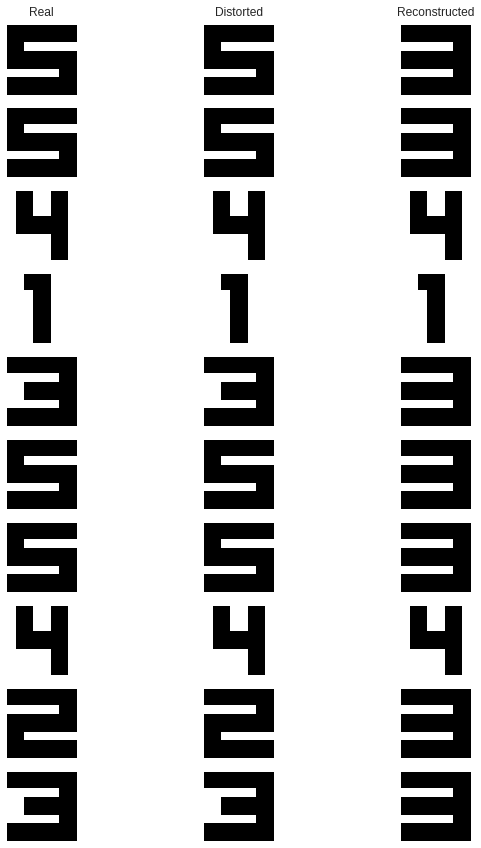

In [9]:


import numpy as np
import matplotlib.pyplot as plt


data = {
    "1": [1, 1, 0, 0, 0, 1, 1, 1,
          1, 1, 0, 0, 0, 1, 1, 1,
          1, 1, 1, 0, 0, 1, 1, 1,
          1, 1, 1, 0, 0, 1, 1, 1,
          1, 1, 1, 0, 0, 1, 1, 1,
          1, 1, 1, 0, 0, 1, 1, 1,
          1, 1, 1, 0, 0, 1, 1, 1,
          1, 1, 1, 0, 0, 1, 1, 1],

    "2": [0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 1, 1,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],

    "3": [0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 0, 0,
          1, 1, 0, 0, 0, 0, 0, 0,
          1, 1, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],

    "4": [1, 0, 0, 1, 1, 0, 0, 1,
          1, 0, 0, 1, 1, 0, 0, 1,
          1, 0, 0, 1, 1, 0, 0, 1,
          1, 0, 0, 0, 0, 0, 0, 1,
          1, 0, 0, 0, 0, 0, 0, 1,
          1, 1, 1, 1, 1, 0, 0, 1,
          1, 1, 1, 1, 1, 0, 0, 1,
          1, 1, 1, 1, 1, 0, 0, 1],

    "5": [0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 1, 1,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],

    "6": [0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 1, 1,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],

    "7": [1, 0, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 0, 0,
          1, 1, 1, 1, 0, 0, 0, 1,
          1, 1, 1, 0, 0, 0, 0, 1,
          1, 1, 1, 0, 0, 1, 1, 1,
          1, 1, 1, 0, 0, 1, 1, 1,
          1, 1, 1, 0, 0, 1, 1, 1],

    "8": [1, 1, 1, 1, 1, 1, 1, 1,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 1, 1],

    "9": [1, 0, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 1, 1, 1, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 1, 0,
          1, 1, 0, 0, 0, 0, 0, 0,
          1, 1, 0, 0, 0, 0, 0, 0],

    "0": [0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],
}

# convert data to biploar 
for key,value in data.items():
    data[key]=[2*x-1 for x in value]
    

distort = 0.0

# Size of image(width)
n_side = 8

# Number of neurons
n_neurons = n_side * n_side

#Generate test data by adding noise to train data
def gen_test_data(n_test=200):
  test_data = []
  for d in range(n_test):
      r_i = np.random.randint(0, n_train)
      base_pattern = np.array(train_data[r_i])
      noise = 1 * (np.random.random(base_pattern.shape) > distort)
      np.place(noise, noise == 0, -1)
      noisy_pattern = np.multiply(base_pattern, noise)
      test_data.append((base_pattern, noisy_pattern))
   
  return test_data

#Training 

def train(number_of_neurons, training_data):
    patterns_num = len(training_data)
    w = np.zeros([number_of_neurons, number_of_neurons])
    mean = np.sum([np.sum(t) for t in training_data]) / (patterns_num * number_of_neurons)
    for i in range(patterns_num):
        data = training_data[i] - mean
        w += np.outer(data, data)
    for diag in range(number_of_neurons):
        w[diag][diag] = 0
    return w

#Calculate the Hamming distance between two data
def ham_dist(s1, s2):
    assert len(s1) == len(s2)
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))  


# Reconstructing a pattern

def reconstruct_pattern(weights, data, steps=5):
    res = np.array(data)
    for _ in range(steps):
        for i in range(len(res)):
            raw_v = np.dot(weights[i], res)             
            if raw_v > 0: 
                res[i] = 1
            else:
                res[i] = -1
    return res
  
  
# Testing
def test(weights, testing_data):
    success = 0.0

    output_data = []
    hd = []
    for data in testing_data:
        true_data = data[0]
        noisy_data = data[1]
        predicted_data = reconstruct_pattern(weights, noisy_data)
        if np.array_equal(true_data, predicted_data):
            success += 1.0

        output_data.append([true_data, noisy_data, predicted_data])

    return (success / len(testing_data)), output_data
  

def ham_dist_patterns(train_data, n_train):
  n = len(train_data)
  total_dist = 0
  i = 0
  for p,q in train_data.items():
    if i > n_train: break
    j = 0
    for s,r in train_data.items():
        if j> i and j < n_train:
          dist = ham_dist(q,r)
          print(f"Hamming distance between {p} and {s} is {dist}");
          total_dist+= dist
        j+=1
    i+=1
  return total_dist

# Train 
n_train = 5
train_data = [np.array(d) for d in data.values()][:n_train]
hd_total = ham_dist_patterns(data, n_train)

print("hd_total:",hd_total)

W = train(n_neurons, train_data)

# Test
test_data = gen_test_data(n_test=200)
accuracy, op_imgs = test(W, test_data)

print("Accuracy of the network is %f" % (accuracy * 100))

"""#### Plot test result"""

def plot_images(images, title, no_i_x, no_i_y=3):
    fig = plt.figure(figsize=(10, 15))
    fig.canvas.set_window_title(title)
    images = np.array(images).reshape(-1, 8, 8)
#     images = np.pad(images, ((0, 0), (1, 1), (1, 1)), 'constant', constant_values=-1)
    for i in range(no_i_x):
        for j in range(no_i_y):
            ax = fig.add_subplot(no_i_x, no_i_y, no_i_x * j + (i + 1))
            ax.matshow(images[no_i_x * j + i], cmap="gray")
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

            if j == 0 and i == 0:
                ax.set_title("Real")
            elif j == 0 and i == 1:
                ax.set_title("Distorted")
            elif j == 0 and i == 2:
                ax.set_title("Reconstructed")
                
plot_images(op_imgs, "Reconstructed Data", 10)
plt.show()

                